# Análisis exploratorio de datos

Permite:
- Organizar y entender las variables
- Establecer relaciones entre las variables
- Encontrar patrones ocultos entre los datos
- Permite elegir el modelo correcto para la necesidad
- Ayuda a tomar decisiones de forma informada

## Etapas del análisis exploratorio

|Hacer preguntas    |Determinar el tamaño de los datos   |Categorizar las variables   |Limpieza y validación de datos   |Establecer relaciones   |
|-                  |-  |-   |-   |-   |
|- Qué te gustaría encontrar? - Qué quisieras saber de los datos? - Cuál es la razón para realizar el análisis?|- Cuántas observaciones existen? - Cuántas variables hay? - Necesito todas las observaciones? - Necesito todas las variables?| - Cuántas variables categórucas o continuas tengo? - Cómo exploro cada variables dependiendo de la categoría|- Tengo valores faltantes? - Que proporción de datos me faltan? - Cuál es la distribución de datos? - Tengo valores atípicos?|- x e y se relacionan? - Se me agrupan las observaciones? - qué significa el patrón de distribución?|

Esto se da de forma ciclica hasta llegar a un resultado final.

## Tipos de análisis
- Descriptivo (past)
- Diagnóstico (past)
- Predictivo (future)
- Prescriptivo (future)

En general se requiere pasar por varios de estos pasos o tipos de análisis.

In [5]:
import pandas as pd
import seaborn as sns

In [3]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

In [4]:
pre_penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [8]:
pre_penguin_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [9]:
pre_penguin_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [11]:
pre_penguin_df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Análisis univariado
Tabulación
Proporciones

In [14]:
pre_penguin_df.describe(include="object")

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [16]:
(
    pre_penguin_df
    .astype({
        "species": "category",
        "island": "category",
        "sex": "category"
    })
    .describe(include="category")
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


<AxesSubplot: >

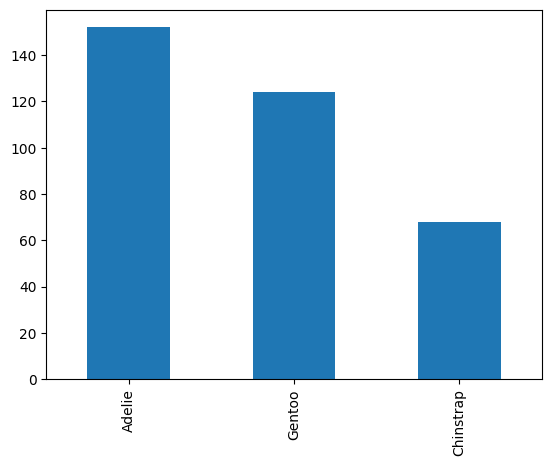

In [17]:
(
    pre_penguin_df
    .species
    .value_counts()
    .plot(
        kind="bar"
    )
)